In [28]:
!pip install lightgbm

In [29]:
pip install yellowbrick














Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Training Data:

In [31]:
train = pd.read_json('train.json', lines = True)
train = train.to_csv('train.csv', index=False)
train = pd.read_csv('train.csv')
train

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,id_ff84602f7,GGAAAAUAGCAGAGGAAAUACUAGAGCAAUUGCAAAGGCCGAUCAU...,........((..((......))...)).........(((..........,EEEEEEEESSIISSHHHHHHSSIIISSXXXXXXXXXSSSHHHHHHH...,4.036,1,

# Testing Data

In [32]:
test = pd.read_csv('test.csv')
test

,id,ID,sequence,structure,seqpos,errors,deg_pH10_Mg_errors,deg_50C_Mg_errors,S/N filter,predicted_loop_type,seq_scored,seq_length,cluster_id,n_neighbors,first_cluster_member,test_filter
0,id_40f52a81b,10207086,GGAAAUUUUCGCGGGACGGGCGGCCGGGCGGAGGCGGCGCGAGGGC...,.......(((((.((.((..(.(((..(((...((..((((....(...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.4419, 0.4736, 0.4529, 0.30820000000000003, ...","[0.4333, 0.491, 0.4375, 0.3079, 0.5534, 0.3432...","[0.5922000000000001, 0.5873, 0.434700000000000...",1,EEEEEEESSSSSISSISSIISISSSIISSSIIISSIISSSSIIIIS...,92,130,694,2,1,1
1,id_59252b684,10207088,GGAAAUUUUCGCGGGACGGGCGGCAGGGCUGAGGUUUCGCGAGGGC...,........(((((((((...((((...))))..))))))))).......,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.3924, 0.3191, 0.3269, 0.2175, 0.3406, 0.259...","[0.4247, 0.3841, 0.34440000000000004, 0.2682, ...","[0.48960000000000004, 0.4184, 0.432, 0.3526, 0...",1,EEEEEEEESSSSSSSSSIIISSSSHHHSSSSIISSSSSSSSSMMMM...,92,130,694,2,0,1
2,id_ebf1148ee,10207093,GGAAAUUUUCGCGAGACAAGCGGCAGGGCUGAGAUUACGCGAGGGC...,........(((((.....(((......))).......)))))..((...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.2933, 0.33140000000000003, 0.2746, 0.237500...","[0.26990000000000003, 0.3124, 0.2505, 0.2142, ...","[0.3024, 0.3673, 0.3183, 0.2696, 0.4048, 0.294...",1,EEEEEEEESSSSSIIIIISSSHHHHHHSSSIIIIIIISSSSSXXSS...,92,130,696,6,1,1
3,id_63c3b7d50,10207098,GGAAAUUUUCGCGAGACCAGCGGCAGGGCUGAGCUAACGCGAGGGC...,........(((((((..((((......))))..))..)))))((.(...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.1713, 0.1758, 0.1399, 0.11220000000000001, ...","[0.15080000000000002, 0.1819, 0.14780000000000...","[0.177, 0.202, 0.1847, 0.1555, 0.2392000000000...",1,EEEEEEEESSSSSSSIISSSSHHHHHHSSSSIISSBBSSSSSSSIS...,92,130,696,6,0,0
4,id_a181978cc,10207103,GGAAAUUUUCGCGAGACCAGCGGCAGGGCUGAGCUAACGCGAGGGC...,........(((((((..((((......))))..))..))))).......,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.1192, 0.1288, 0.1018, 0.09290000000000001, ...","[0.1279, 0.14350000000000002, 0.1061, 0.0945, ...","[0.136, 0.1564, 0.1408, 0.11810000000000001, 0...",1,EEEEEEEESSSSSSSIISSSSHHHHHHSSSSIISSBBSSSSSXXXX...,92,130,696,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,id_5c0071c56,10238485,GGAAACGUCUGUAGCACGAGGCUACAGACGAAUAGGUAGACAGCAC...,.....((((((((((.....))))))))))....((((((((((.....,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0552, 1.0273, 1.0804, 0.8338, 0.2848, 0.484...","[0.8345, 1.3876, 1.0754, 0.36410000000000003, ...","[0.9438000000000001, 1.2479, 0.6237, 0.6198, 0...",1,EEEEESSSSSSSSSSHHHHHSSSSSSSSSSXXXXSSSSSSSSSSHH...,92,130,5,18,0,0
2489,id_8b7abea64,10238487,GGAAACGUCUGUAGCACGCCGCUACAGACGAAUAGGUAGACAGCCC...,.....((((((((((.....))))))))))....((((((((((.....,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5730000000000001, 0.5761000000000001, 0.402...","[0.6393, 0.9389000000000001, 0.5058, 0.3779, 0...","[0.6756, 0.8459, 0.6091, 0.4842, 0.4474, 0.331...",1,EEEEESSSSSSSSSSHHHHHSSSSSSSSSSXXXXSSSSSSSSSSHH...,92,130,5,18,0,0
2490,id_b2e8f5a61,10238502,GGAAACGGCACGUAGCGCAGCCUGGUAGCGCACCGUCAUGGGAUGU...,.....(((((((..((((.........)))).(((.((.....))....,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.2604, 0.24330000000000002, 0.2564, 0.2167, ...","[0.2466, 0.24180000000000001, 0.24, 0.2686, 0....","[0.2514, 0.3181, 0.2554, 0.2374, 0.1895, 0.099...",1,EEEEESSSSSSSMMSSSSHHHHHHHHHSSSSMSSSISSHHHHHSSI...,92,130,384,2,0,1
2491,id_fc2f0dd53,10238504,GGAAACGUCUGUAGUACAACGCUACAGACGAAUAGGUAGACAGCCC...,.....((((((((((.....))))))))))....((((((((((.....,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.1889, 0.1832, 0.1447, 0.145, 0.089500000000...","[0.2409, 0.36960000000000004, 0.136, 0.131, 0....","[0.2189, 0.3059, 0.164, 0.1381, 0.1432, 0.0724...",1,EEEEESSSSSSSSSSHHHHHSSSSSSSSSSMMMMSSSSSSSSSSHH...,92,130,4,26,0,0


In [33]:
test.loc[0,'deg_pH10_Mg_errors']

'[0.4333, 0.491, 0.4375, 0.3079, 0.5534, 0.3432, 0.398, 0.4423, 0.3221, 0.2172, 0.2177, 0.16340000000000002, 0.20320000000000002, 0.1894, 0.133, 0.22510000000000002, 0.1948, 0.19540000000000002, 0.1882, 0.18080000000000002, 0.1526, 0.16620000000000001, 0.1716, 0.11180000000000001, 0.1499, 0.12090000000000001, 0.18150000000000002, 0.1618, 0.2116, 0.20040000000000002, 0.1753, 0.24080000000000001, 0.193, 0.132, 0.1582, 0.1222, 0.1308, 0.17980000000000002, 0.1781, 0.20570000000000002, 0.2194, 0.2278, 0.22110000000000002, 0.2233, 0.1675, 0.1247, 0.1364, 0.1836, 0.2504, 0.1739, 0.1988, 0.185, 0.1645, 0.1812, 0.1474, 0.1613, 0.1691, 0.1242, 0.1096, 0.1359, 0.19160000000000002, 0.1761, 0.1779, 0.16160000000000002, 0.1355, 0.0975, 0.14300000000000002, 0.16160000000000002, 0.16, 0.1371, 0.12510000000000002, 0.1434, 0.161, 0.1544, 0.15460000000000002, 0.1554, 0.18630000000000002, 0.1374, 0.10980000000000001, 0.0695, 0.1278, 0.0911, 0.0821, 0.099, 0.0687, 0.09860000000000001, 0.08170000000000001, 

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2400 entries, 0 to 2399

Data columns (total 19 columns):

 #   Column               Non-Null Count  Dtype  

---  ------               --------------  -----  

 0   index                2400 non-null   int64  

 1   id                   2400 non-null   object 

 2   sequence             2400 non-null   object 

 3   structure            2400 non-null   object 

 4   predicted_loop_type  2400 non-null   object 

 5   signal_to_noise      2400 non-null   float64

 6   SN_filter            2400 non-null   int64  

 7   seq_length           2400 non-null   int64  

 8   seq_scored           2400 non-null   int64  

 9   reactivity_error     2400 non-null   object 

 10  deg_error_Mg_pH10    2400 non-null   object 

 11  deg_error_pH10       2400 non-null   object 

 12  deg_error_Mg_50C     2400 non-null   object 

 13  deg_error_50C        2400 non-null   object 

 14  reactivity           2400 non-null   object 

 15  deg_Mg_pH10       

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2493 entries, 0 to 2492

Data columns (total 16 columns):

 #   Column                Non-Null Count  Dtype 

---  ------                --------------  ----- 

 0   id                    2493 non-null   object

 1   ID                    2493 non-null   int64 

 2   sequence              2493 non-null   object

 3   structure             2493 non-null   object

 4   seqpos                2493 non-null   object

 5   errors                2493 non-null   object

 6   deg_pH10_Mg_errors    2493 non-null   object

 7   deg_50C_Mg_errors     2493 non-null   object

 8   S/N filter            2493 non-null   int64 

 9   predicted_loop_type   2493 non-null   object

 10  seq_scored            2493 non-null   int64 

 11  seq_length            2493 non-null   int64 

 12  cluster_id            2493 non-null   int64 

 13  n_neighbors           2493 non-null   int64 

 14  first_cluster_member  2493 non-null   int64 

 15  test_filter       

In [36]:
test['S/N filter'].value_counts()

1    2493
Name: S/N filter, dtype: int64

In [37]:
test['seqpos'].value_counts()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]    2493
Name: seqpos, dtype: int64

# converting columns from string to array

In [38]:
from ast import literal_eval

cols = ['reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10',
        'deg_pH10', 'deg_error_pH10', 'deg_Mg_50C', 'deg_error_Mg_50C',
        'deg_50C', 'deg_error_50C']

for col in cols:
    train[col] = train[col].apply(literal_eval)
    
train[col]

0       [0.2167, 0.34750000000000003, 0.188, 0.2124, 0...
1       [15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...
2       [0.14980000000000002, 0.1761, 0.1517, 0.116700...
3       [15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...
4       [1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...
                              ...                        
2395    [0.29460000000000003, 0.40850000000000003, 0.3...
2396    [0.401, 0.388, 0.3403, 0.3608, 0.3057, 0.242, ...
2397    [4.747, 4.8132, 3.0986, 2.9818, 2.8738, 1.4856...
2398    [0.1691, 0.22740000000000002, 0.178, 0.1762, 0...
2399    [0.2379, 0.27590000000000003, 0.22160000000000...
Name: deg_error_50C, Length: 2400, dtype: object

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2400 entries, 0 to 2399

Data columns (total 19 columns):

 #   Column               Non-Null Count  Dtype  

---  ------               --------------  -----  

 0   index                2400 non-null   int64  

 1   id                   2400 non-null   object 

 2   sequence             2400 non-null   object 

 3   structure            2400 non-null   object 

 4   predicted_loop_type  2400 non-null   object 

 5   signal_to_noise      2400 non-null   float64

 6   SN_filter            2400 non-null   int64  

 7   seq_length           2400 non-null   int64  

 8   seq_scored           2400 non-null   int64  

 9   reactivity_error     2400 non-null   object 

 10  deg_error_Mg_pH10    2400 non-null   object 

 11  deg_error_pH10       2400 non-null   object 

 12  deg_error_Mg_50C     2400 non-null   object 

 13  deg_error_50C        2400 non-null   object 

 14  reactivity           2400 non-null   object 

 15  deg_Mg_pH10       

# Data Flatten

In [40]:
train_data = []
for mol_id in train['id'].unique():
    sample_data = train.loc[train['id'] == mol_id]
    for i in range(68):
        sample_tuple = (sample_data['id'].values[0], sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i], sample_data['predicted_loop_type'].values[0][i],
                        sample_data['reactivity'].values[0][i], sample_data['reactivity_error'].values[0][i],
                        sample_data['deg_Mg_pH10'].values[0][i], sample_data['deg_error_Mg_pH10'].values[0][i],
                        sample_data['deg_pH10'].values[0][i], sample_data['deg_error_pH10'].values[0][i],
                        sample_data['deg_Mg_50C'].values[0][i], sample_data['deg_error_Mg_50C'].values[0][i],
                        sample_data['deg_50C'].values[0][i], sample_data['deg_error_50C'].values[0][i])
        train_data.append(sample_tuple)

In [41]:
train_data = pd.DataFrame(train_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type',
                                               'reactivity', 'reactivity_error', 'deg_Mg_pH10', 'deg_error_Mg_pH10',
                                               'deg_pH10', 'deg_error_pH10', 'deg_Mg_50C', 'deg_error_Mg_50C',
                                               'deg_50C', 'deg_error_50C'])
train_data

,id,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C
0,id_001f94081,G,.,E,0.3297,0.1359,0.7556,0.2613,2.3375,0.2631,0.3581,0.1501,0.6382,0.2167
1,id_001f94081,G,.,E,1.5693,0.2070,2.9830,0.3842,3.5060,0.2860,2.9683,0.2750,3.4773,0.3475
2,id_001f94081,A,.,E,1.1227,0.1633,0.2526,0.1372,0.3008,0.0964,0.2589,0.0947,0.9988,0.1880
3,id_001f94081,A,.,E,0.8686,0.1452,1.3789,0.2531,1.0108,0.1574,1.4552,0.1866,1.3228,0.2124
4,id_001f94081,A,.,E,0.7217,0.1314,0.6376,0.1798,0.2635,0.1000,0.7244,0.1369,0.7877,0.1703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163195,id_fff546103,C,),S,0.0272,0.0267,0.5059,0.0626,0.4998,0.0996,0.2870,0.0638,0.1820,0.0809
163196,id_fff546103,U,),S,0.0382,0.0219,0.2025,0.0411,0.3057,0.0760,0.2022,0.0520,0.2038,0.0748
163197,id_fff546103,A,),S,0.0381,0.0218,0.1827,0.0391,0.1642,0.0611,0.2047,0.0520,0.1120,0.0612
163198,id_fff546103,G,),S,-0.0066,0.0220,0.3261,0.0509,0.1654,0.0719,0.2447,0.0595,0.1186,0.0723


In [42]:
train_data = train_data.drop('id', axis = 1)

# encoding

In [43]:
from sklearn.preprocessing import OneHotEncoder

# one hot encoder for 'sequence'

ohe = OneHotEncoder(handle_unknown='ignore')
onehot_encoded = ohe.fit_transform(train_data[['sequence']].values.reshape(-1,1))

train_data['sequence'] = onehot_encoded.toarray()
onehot_encoded

<163200x4 sparse matrix of type '<class 'numpy.float64'>'
	with 163200 stored elements in Compressed Sparse Row format>

In [44]:
train_data

,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C
0,0.0,.,E,0.3297,0.1359,0.7556,0.2613,2.3375,0.2631,0.3581,0.1501,0.6382,0.2167
1,0.0,.,E,1.5693,0.2070,2.9830,0.3842,3.5060,0.2860,2.9683,0.2750,3.4773,0.3475
2,1.0,.,E,1.1227,0.1633,0.2526,0.1372,0.3008,0.0964,0.2589,0.0947,0.9988,0.1880
3,1.0,.,E,0.8686,0.1452,1.3789,0.2531,1.0108,0.1574,1.4552,0.1866,1.3228,0.2124
4,1.0,.,E,0.7217,0.1314,0.6376,0.1798,0.2635,0.1000,0.7244,0.1369,0.7877,0.1703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163195,0.0,),S,0.0272,0.0267,0.5059,0.0626,0.4998,0.0996,0.2870,0.0638,0.1820,0.0809
163196,0.0,),S,0.0382,0.0219,0.2025,0.0411,0.3057,0.0760,0.2022,0.0520,0.2038,0.0748
163197,1.0,),S,0.0381,0.0218,0.1827,0.0391,0.1642,0.0611,0.2047,0.0520,0.1120,0.0612
163198,0.0,),S,-0.0066,0.0220,0.3261,0.0509,0.1654,0.0719,0.2447,0.0595,0.1186,0.0723


In [45]:
import category_encoders as ce

# ordinal encoder for 'structure' and 'predicted loop type'

encoder= ce.OrdinalEncoder(cols=['structure'],return_df=True,
                        mapping=[{'col':'structure',
                                  'mapping':{'.':0, ')':1, '(':1}}])
train_data['structure'] = encoder.fit_transform(train_data['structure'])
train_data

,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C
0,0.0,0,E,0.3297,0.1359,0.7556,0.2613,2.3375,0.2631,0.3581,0.1501,0.6382,0.2167
1,0.0,0,E,1.5693,0.2070,2.9830,0.3842,3.5060,0.2860,2.9683,0.2750,3.4773,0.3475
2,1.0,0,E,1.1227,0.1633,0.2526,0.1372,0.3008,0.0964,0.2589,0.0947,0.9988,0.1880
3,1.0,0,E,0.8686,0.1452,1.3789,0.2531,1.0108,0.1574,1.4552,0.1866,1.3228,0.2124
4,1.0,0,E,0.7217,0.1314,0.6376,0.1798,0.2635,0.1000,0.7244,0.1369,0.7877,0.1703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163195,0.0,1,S,0.0272,0.0267,0.5059,0.0626,0.4998,0.0996,0.2870,0.0638,0.1820,0.0809
163196,0.0,1,S,0.0382,0.0219,0.2025,0.0411,0.3057,0.0760,0.2022,0.0520,0.2038,0.0748
163197,1.0,1,S,0.0381,0.0218,0.1827,0.0391,0.1642,0.0611,0.2047,0.0520,0.1120,0.0612
163198,0.0,1,S,-0.0066,0.0220,0.3261,0.0509,0.1654,0.0719,0.2447,0.0595,0.1186,0.0723


In [46]:
encoder_pl= ce.OrdinalEncoder(cols=['predicted_loop_type'],return_df=True,
                        mapping=[{'col':'predicted_loop_type',
                                  'mapping':{'E':0, 'S':1, 'B':2, 'M':3, 'I':4, 'X':5, 'H':6}}])
train_data['predicted_loop_type'] = encoder_pl.fit_transform(train_data['predicted_loop_type'])
train_data

,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C
0,0.0,0,0,0.3297,0.1359,0.7556,0.2613,2.3375,0.2631,0.3581,0.1501,0.6382,0.2167
1,0.0,0,0,1.5693,0.2070,2.9830,0.3842,3.5060,0.2860,2.9683,0.2750,3.4773,0.3475
2,1.0,0,0,1.1227,0.1633,0.2526,0.1372,0.3008,0.0964,0.2589,0.0947,0.9988,0.1880
3,1.0,0,0,0.8686,0.1452,1.3789,0.2531,1.0108,0.1574,1.4552,0.1866,1.3228,0.2124
4,1.0,0,0,0.7217,0.1314,0.6376,0.1798,0.2635,0.1000,0.7244,0.1369,0.7877,0.1703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163195,0.0,1,1,0.0272,0.0267,0.5059,0.0626,0.4998,0.0996,0.2870,0.0638,0.1820,0.0809
163196,0.0,1,1,0.0382,0.0219,0.2025,0.0411,0.3057,0.0760,0.2022,0.0520,0.2038,0.0748
163197,1.0,1,1,0.0381,0.0218,0.1827,0.0391,0.1642,0.0611,0.2047,0.0520,0.1120,0.0612
163198,0.0,1,1,-0.0066,0.0220,0.3261,0.0509,0.1654,0.0719,0.2447,0.0595,0.1186,0.0723


# X and y split

In [47]:
y = train_data[['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']]
X = train_data.drop(y, axis =1)
X

,sequence,structure,predicted_loop_type,reactivity_error,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_50C,deg_error_50C
0,0.0,0,0,0.1359,0.2613,2.3375,0.2631,0.1501,0.6382,0.2167
1,0.0,0,0,0.2070,0.3842,3.5060,0.2860,0.2750,3.4773,0.3475
2,1.0,0,0,0.1633,0.1372,0.3008,0.0964,0.0947,0.9988,0.1880
3,1.0,0,0,0.1452,0.2531,1.0108,0.1574,0.1866,1.3228,0.2124
4,1.0,0,0,0.1314,0.1798,0.2635,0.1000,0.1369,0.7877,0.1703
...,...,...,...,...,...,...,...,...,...,...
163195,0.0,1,1,0.0267,0.0626,0.4998,0.0996,0.0638,0.1820,0.0809
163196,0.0,1,1,0.0219,0.0411,0.3057,0.0760,0.0520,0.2038,0.0748
163197,1.0,1,1,0.0218,0.0391,0.1642,0.0611,0.0520,0.1120,0.0612
163198,0.0,1,1,0.0220,0.0509,0.1654,0.0719,0.0595,0.1186,0.0723


# Dropping highly correlated features

In [48]:
# corr_c = X.corr()
# sns.heatmap(corr_c, cmap="BuPu")

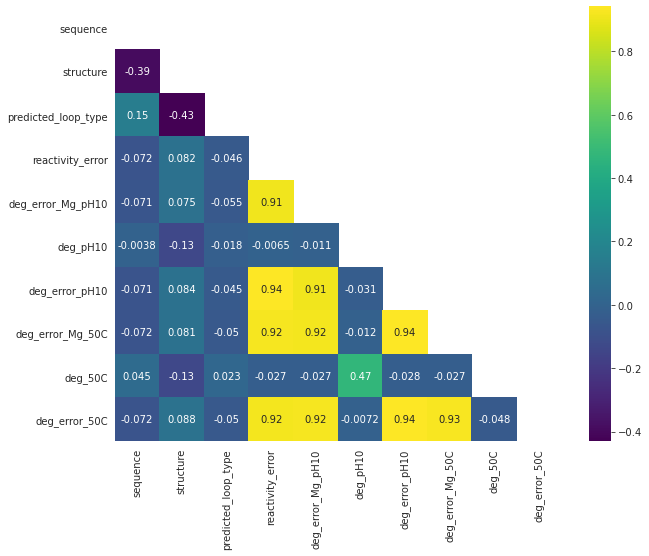

In [54]:
mask = np.zeros_like(corr_c)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (10, 8))
    ax = sns.heatmap(corr_c, mask=mask, annot = True, cmap = 'viridis')

In [55]:
dropped_cols = ['reactivity_error', 'deg_pH10', 'deg_error_pH10', 'deg_50C', 'deg_error_50C']
X = X.drop(dropped_cols, axis = 1)
X

,sequence,structure,predicted_loop_type,deg_error_Mg_pH10,deg_error_Mg_50C
0,0.0,0,0,0.2613,0.1501
1,0.0,0,0,0.3842,0.2750
2,1.0,0,0,0.1372,0.0947
3,1.0,0,0,0.2531,0.1866
4,1.0,0,0,0.1798,0.1369
...,...,...,...,...,...
163195,0.0,1,1,0.0626,0.0638
163196,0.0,1,1,0.0411,0.0520
163197,1.0,1,1,0.0391,0.0520
163198,0.0,1,1,0.0509,0.0595


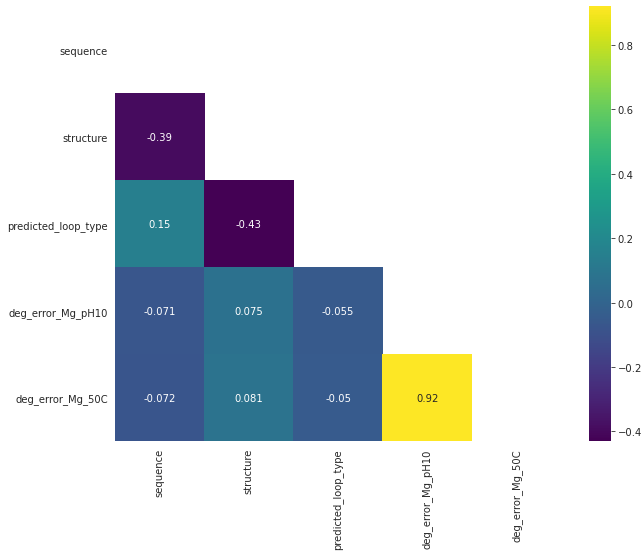

In [56]:
corr_c = X.corr()
# sns.heatmap(corr_c)
mask = np.zeros_like(corr_c)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (10, 8))
    ax = sns.heatmap(corr_c, mask=mask, annot = True, cmap = 'viridis')

# train & validation split:

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 200)

# modeling and evaluation (validation data):

In [41]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoost


regr = MultiOutputRegressor(XGBRegressor()).fit(X_train, y_train)


In [42]:
yhat = regr.predict(X_val)

In [43]:
def MCRMSE(y_true, y_pred):
    colwise_mse = np.mean(np.square(y_true - y_pred), axis=1)
    return np.mean(np.sqrt(colwise_mse))

In [44]:
MCRMSE(y_val, yhat)

0.31997010698180944

In [177]:
# from yellowbrick.regressor import PredictionError, ResidualsPlot
# from IPython.display import display

# visualizer = PredictionError(regr)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())
# visualizer = ResidualsPlot(regr)
# visualizer.fit(X_train, y_train)
# visualizer.score(X_val, y_val)
# display(visualizer.poof())

# prepairing test data:

In [45]:
test.columns

Index(['id', 'ID', 'sequence', 'structure', 'seqpos', 'errors',
       'deg_pH10_Mg_errors', 'deg_50C_Mg_errors', 'S/N filter',
       'predicted_loop_type', 'seq_scored', 'seq_length', 'cluster_id',
       'n_neighbors', 'first_cluster_member', 'test_filter'],
      dtype='object')

In [46]:
test = test[['id', 'sequence', 'structure','predicted_loop_type', 'deg_pH10_Mg_errors', 'deg_50C_Mg_errors']]

In [47]:
test = test.rename(columns = {'deg_pH10_Mg_errors':'deg_error_Mg_pH10', 'deg_50C_Mg_errors':'deg_error_Mg_50C'})

In [48]:
test

,id,sequence,structure,predicted_loop_type,deg_error_Mg_pH10,deg_error_Mg_50C
0,id_40f52a81b,GGAAAUUUUCGCGGGACGGGCGGCCGGGCGGAGGCGGCGCGAGGGC...,.......(((((.((.((..(.(((..(((...((..((((....(...,EEEEEEESSSSSISSISSIISISSSIISSSIIISSIISSSSIIIIS...,"[0.4333, 0.491, 0.4375, 0.3079, 0.5534, 0.3432...","[0.5922000000000001, 0.5873, 0.434700000000000..."
1,id_59252b684,GGAAAUUUUCGCGGGACGGGCGGCAGGGCUGAGGUUUCGCGAGGGC...,........(((((((((...((((...))))..))))))))).......,EEEEEEEESSSSSSSSSIIISSSSHHHSSSSIISSSSSSSSSMMMM...,"[0.4247, 0.3841, 0.34440000000000004, 0.2682, ...","[0.48960000000000004, 0.4184, 0.432, 0.3526, 0..."
2,id_ebf1148ee,GGAAAUUUUCGCGAGACAAGCGGCAGGGCUGAGAUUACGCGAGGGC...,........(((((.....(((......))).......)))))..((...,EEEEEEEESSSSSIIIIISSSHHHHHHSSSIIIIIIISSSSSXXSS...,"[0.26990000000000003, 0.3124, 0.2505, 0.2142, ...","[0.3024, 0.3673, 0.3183, 0.2696, 0.4048, 0.294..."
3,id_63c3b7d50,GGAAAUUUUCGCGAGACCAGCGGCAGGGCUGAGCUAACGCGAGGGC...,........(((((((..((((......))))..))..)))))((.(...,EEEEEEEESSSSSSSIISSSSHHHHHHSSSSIISSBBSSSSSSSIS...,"[0.15080000000000002, 0.1819, 0.14780000000000...","[0.177, 0.202, 0.1847, 0.1555, 0.2392000000000..."
4,id_a181978cc,GGAAAUUUUCGCGAGACCAGCGGCAGGGCUGAGCUAACGCGAGGGC...,........(((((((..((((......))))..))..))))).......,EEEEEEEESSSSSSSIISSSSHHHHHHSSSSIISSBBSSSSSXXXX...,"[0.1279, 0.14350000000000002, 0.1061, 0.0945, ...","[0.136, 0.1564, 0.1408, 0.11810000000000001, 0..."
...,...,...,...,...,...,...
2488,id_5c0071c56,GGAAACGUCUGUAGCACGAGGCUACAGACGAAUAGGUAGACAGCAC...,.....((((((((((.....))))))))))....((((((((((.....,EEEEESSSSSSSSSSHHHHHSSSSSSSSSSXXXXSSSSSSSSSSHH...,"[0.8345, 1.3876, 1.0754, 0.36410000000000003, ...","[0.9438000000000001, 1.2479, 0.6237, 0.6198, 0..."
2489,id_8b7abea64,GGAAACGUCUGUAGCACGCCGCUACAGACGAAUAGGUAGACAGCCC...,.....((((((((((.....))))))))))....((((((((((.....,EEEEESSSSSSSSSSHHHHHSSSSSSSSSSXXXXSSSSSSSSSSHH...,"[0.6393, 0.9389000000000001, 0.5058, 0.3779, 0...","[0.6756, 0.8459, 0.6091, 0.4842, 0.4474, 0.331..."
2490,id_b2e8f5a61,GGAAACGGCACGUAGCGCAGCCUGGUAGCGCACCGUCAUGGGAUGU...,.....(((((((..((((.........)))).(((.((.....))....,EEEEESSSSSSSMMSSSSHHHHHHHHHSSSSMSSSISSHHHHHSSI...,"[0.2466, 0.24180000000000001, 0.24, 0.2686, 0....","[0.2514, 0.3181, 0.2554, 0.2374, 0.1895, 0.099..."
2491,id_fc2f0dd53,GGAAACGUCUGUAGUACAACGCUACAGACGAAUAGGUAGACAGCCC...,.....((((((((((.....))))))))))....((((((((((.....,EEEEESSSSSSSSSSHHHHHSSSSSSSSSSMMMMSSSSSSSSSSHH...,"[0.2409, 0.36960000000000004, 0.136, 0.131, 0....","[0.2189, 0.3059, 0.164, 0.1381, 0.1432, 0.0724..."


In [49]:
t_cols = ['deg_error_Mg_pH10', 'deg_error_Mg_50C']

for col in t_cols:
    test[col] = test[col].apply(literal_eval)
    
test[col]

0       [0.5922000000000001, 0.5873, 0.434700000000000...
1       [0.48960000000000004, 0.4184, 0.432, 0.3526, 0...
2       [0.3024, 0.3673, 0.3183, 0.2696, 0.4048, 0.294...
3       [0.177, 0.202, 0.1847, 0.1555, 0.2392000000000...
4       [0.136, 0.1564, 0.1408, 0.11810000000000001, 0...
                              ...                        
2488    [0.9438000000000001, 1.2479, 0.6237, 0.6198, 0...
2489    [0.6756, 0.8459, 0.6091, 0.4842, 0.4474, 0.331...
2490    [0.2514, 0.3181, 0.2554, 0.2374, 0.1895, 0.099...
2491    [0.2189, 0.3059, 0.164, 0.1381, 0.1432, 0.0724...
2492    [0.837, 1.1294, 0.6531, 0.486, 0.4720000000000...
Name: deg_error_Mg_50C, Length: 2493, dtype: object

In [50]:
test_data = []
for mol_id in test['id'].unique():
    sample_data = test.loc[test['id'] == mol_id]
    for i in range(102):
        sample_tuple = (sample_data['id'].values[0], 
                        sample_data['sequence'].values[0][i],
                        sample_data['structure'].values[0][i], 
                        sample_data['predicted_loop_type'].values[0][i],
                        sample_data['deg_error_Mg_pH10'].values[0][i], 
                        sample_data['deg_error_Mg_50C'].values[0][i])
                     
        test_data.append(sample_tuple)
        

In [51]:
test_data = pd.DataFrame(test_data, columns=['id', 'sequence', 'structure', 'predicted_loop_type',
                                               'deg_error_Mg_pH10','deg_error_Mg_50C'])
test_data

,id,sequence,structure,predicted_loop_type,deg_error_Mg_pH10,deg_error_Mg_50C
0,id_40f52a81b,G,.,E,0.4333,0.5922
1,id_40f52a81b,G,.,E,0.4910,0.5873
2,id_40f52a81b,A,.,E,0.4375,0.4347
3,id_40f52a81b,A,.,E,0.3079,0.4182
4,id_40f52a81b,A,.,E,0.5534,0.6207
...,...,...,...,...,...,...
254281,id_1f4f84bfb,U,(,S,0.1668,0.3282
254282,id_1f4f84bfb,U,.,H,0.4051,0.4397
254283,id_1f4f84bfb,U,.,H,0.1620,0.2320
254284,id_1f4f84bfb,C,.,H,0.2638,0.3359


In [52]:
ID = test_data['id']
test_data = test_data.drop('id', axis = 1)

In [53]:
# encoding test data

ohe = OneHotEncoder(handle_unknown='ignore')
onehot_encoded = ohe.fit_transform(test_data[['sequence']].values.reshape(-1,1))

test_data['sequence'] = onehot_encoded.toarray()




encoder= ce.OrdinalEncoder(cols=['structure'],return_df=True,
                        mapping=[{'col':'structure',
                                  'mapping':{'.':0, ')':1, '(':1}}])
test_data['structure'] = encoder.fit_transform(test_data['structure'])




encoder_pl= ce.OrdinalEncoder(cols=['predicted_loop_type'],return_df=True,
                        mapping=[{'col':'predicted_loop_type',
                                  'mapping':{'E':0, 'S':1, 'B':2, 'M':3, 'I':4, 'X':5, 'H':6}}])
test_data['predicted_loop_type'] = encoder_pl.fit_transform(test_data['predicted_loop_type'])

In [54]:
test_data

,sequence,structure,predicted_loop_type,deg_error_Mg_pH10,deg_error_Mg_50C
0,0.0,0,0,0.4333,0.5922
1,0.0,0,0,0.4910,0.5873
2,1.0,0,0,0.4375,0.4347
3,1.0,0,0,0.3079,0.4182
4,1.0,0,0,0.5534,0.6207
...,...,...,...,...,...
254281,0.0,1,1,0.1668,0.3282
254282,0.0,0,6,0.4051,0.4397
254283,0.0,0,6,0.1620,0.2320
254284,0.0,0,6,0.2638,0.3359


In [55]:
regr.fit(X,y)
y_final = regr.predict(test_data)

y_final[:,0]

array([0.44529238, 0.7109414 , 0.7394453 , ..., 0.566225  , 0.65541226,
       0.73429894], dtype=float32)

In [56]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id_seqpos,reactivity,deg_Mg_pH10,deg_Mg_50C
0,id_40f52a81b_0,0,0,0
1,id_40f52a81b_1,0,0,0
2,id_40f52a81b_2,0,0,0
3,id_40f52a81b_3,0,0,0
4,id_40f52a81b_4,0,0,0
...,...,...,...,...
254281,id_1f4f84bfb_97,0,0,0
254282,id_1f4f84bfb_98,0,0,0
254283,id_1f4f84bfb_99,0,0,0
254284,id_1f4f84bfb_100,0,0,0


In [172]:
sample_submission['reactivity'] = y_final[:,0]
sample_submission['deg_Mg_pH10'] = y_final[:,1]
sample_submission['deg_Mg_50C'] = y_final[:,2]

In [173]:
sample_submission

,id_seqpos,reactivity,deg_Mg_pH10,deg_Mg_50C
0,id_40f52a81b_0,0.454585,0.493358,0.822674
1,id_40f52a81b_1,0.750779,0.693784,0.998476
2,id_40f52a81b_2,0.780134,0.616411,0.698372
3,id_40f52a81b_3,0.329876,0.197438,0.392388
4,id_40f52a81b_4,0.646469,0.487135,0.675406
...,...,...,...,...
254281,id_1f4f84bfb_97,0.089145,0.077820,0.156614
254282,id_1f4f84bfb_98,0.742337,0.829229,0.737988
254283,id_1f4f84bfb_99,0.549221,0.200229,0.619890
254284,id_1f4f84bfb_100,0.659646,0.491204,0.721411


In [174]:
sample_submission.to_csv('version4.csv', index = False)